# Principle Component Analysis
This notebook will implement Principle Component Analysis with the [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv) dataset.

In [77]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [78]:
#importing the dataset as a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/IBMEmployeeAttrition.csv")

## Pre-Processing
Before we can run PCA, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

First, we remove variables with zero variance (as uncovered in the [Exploring A New Dataset](https://github.com/Madison-Bunting/INDE-577/blob/main/Exploring%20a%20New%20Dataset.ipynb) Notebook.

In [79]:
#Drop variables with zero variance: EmployeeCount, Over18, and StandardHours
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)

#Replacing Yes/No in the target variable (Attrition) with 1/0
df['Attrition'] = df['Attrition'].map({'No':0, 'Yes':1})

Correlated variables will impact PCA outputs, so those should be dropped as well. As uncovered in the [Exploring A New Dataset](https://github.com/Madison-Bunting/INDE-577/blob/main/Exploring%20a%20New%20Dataset.ipynb) Notebook, we should drop Job Level, Total Working Years, Years in Current Role, Years with Current Manager, and Percent Salary Hike.

In [80]:
#Dropping variables listed above that are correlated
df_final = df.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PercentSalaryHike'], axis=1)
#Confirm those variables were sucessfully dropped
df_final

,Index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,19479,8,Yes,3,1,0,0,1,6,0
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,24907,1,No,4,4,1,3,3,10,1
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2396,6,Yes,3,2,0,3,3,0,0
3,4,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,23159,1,Yes,3,3,0,3,3,8,3
4,5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,...,12290,4,No,3,3,1,3,3,5,0
1466,1467,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,...,21457,4,No,3,1,1,5,3,7,1
1467,1468,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,...,5174,1,Yes,4,2,1,0,3,6,0
1468,1469,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,...,13243,2,No,3,4,0,3,2,9,0


In [81]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df_final)

The next step is to select which features we want to use with PCA and standardize them.

In [82]:
#Selecting features
X = encoded_df.drop(['Attrition'],axis =1)
y = encoded_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [83]:
#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(X)

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


## Split into Train and Test data
To apply PCA, the data must be split into "training" and "test" data.

In [84]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

We can decide the number of components we need in the output, but it is more effictive to specify the minimum variation that we want to be retained and allow the model to provide the number of components.

In [85]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
n = 90
pca = PCA(n/100)

#Fit the model with data
pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

To retain 90 % of the variation, we needed 21 components


In [86]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(1102, 21)
(368, 21)


Text(0, 0.5, 'Second Principal Component')

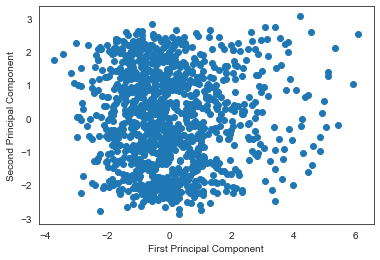

In [87]:
#Visualize the principal components
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [91]:
#Investigating at the principal components
pca.components_[0]

array([ 0.03498842,  0.45044156,  0.04333775, -0.00456985, -0.12121745,
       -0.00121176,  0.17304076, -0.04459927,  0.0349722 ,  0.01658942,
       -0.0310212 , -0.00360652,  0.01459375, -0.19084229, -0.05203105,
       -0.16957274,  0.50103497, -0.0318582 ,  0.16604293,  0.00296566,
       -0.0177857 ,  0.04133265,  0.11233753, -0.05741361,  0.01639979,
        0.46628444,  0.40189726])

The algorithm is implemented at the end of the notebooks below: 
- [Logistic Regression](https://github.com/Madison-Bunting/INDE-577/tree/main/supervised%20learning/2%20-%20logistic%20regression)
- [K Nearest Neighbors](https://github.com/Madison-Bunting/INDE-577/tree/main/supervised%20learning/5%20-%20K%20nearest%20neighbors)
- [Naive Bayes Classifier](https://github.com/Madison-Bunting/INDE-577/blob/main/supervised%20learning/6%20-%20naive%20bayes%20classifier/README.md)
- [Support Vector Machines](https://github.com/Madison-Bunting/INDE-577/tree/main/supervised%20learning/7%20-%20support%20vector%20machines)
- [Decision/Regression Trees](https://github.com/Madison-Bunting/INDE-577/tree/main/supervised%20learning/8%20-%20decision-regression%20trees)
- [Ensemble Learning](https://github.com/Madison-Bunting/INDE-577/tree/main/supervised%20learning/9%20-%20ensemble%20learning)

The data below was pulled from the results in those notebooks so it is easier to visualize the impact of PCA with different algorithms.

In [92]:
accuracy = {'Model': ['Logistic Regression', 'Decision Tree - Gini', 'Decision Tree - Entropy', 'K Nearest Neighbors', 'Naive Bayes', 'SVM', 'Random Forest'], 
               'Accuracy - no PCA (%)': [90, 85, 85, 85, 87, 87, 86], 
               'Accuracy - PCA (%)': [88, 84, 84, 86, 88, 86, 85]
              }

acc = pd.DataFrame(data=accuracy)
acc

,Model,Accuracy - no PCA (%),Accuracy - PCA (%)
0,Logistic Regression,90,88
1,Decision Tree - Gini,85,84
2,Decision Tree - Entropy,85,84
3,K Nearest Neighbors,85,86
4,Naive Bayes,87,88
5,SVM,87,86
6,Random Forest,86,85


In [93]:
acc = acc.set_index('Model')

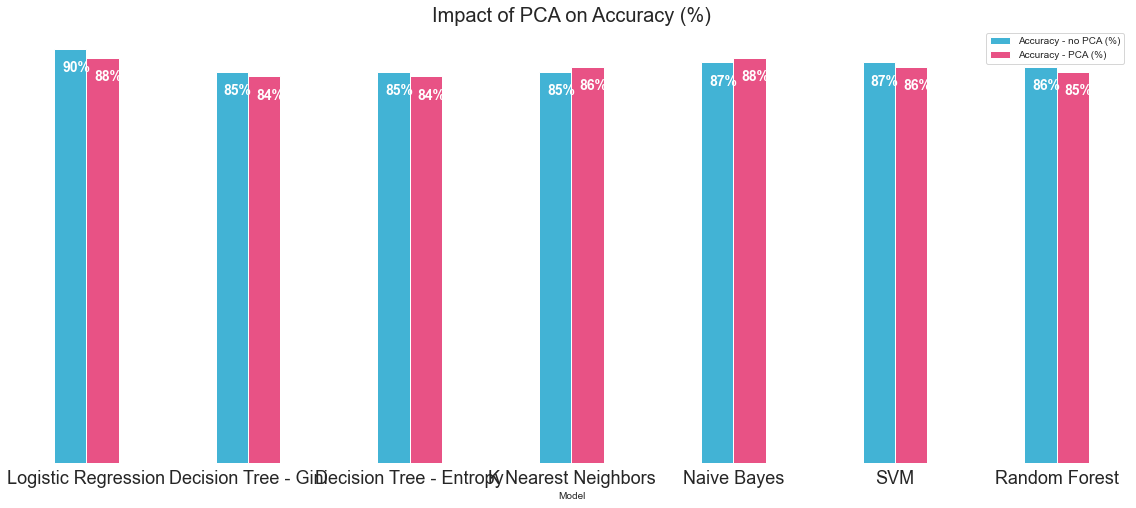

In [94]:
sns.set_style(style='white')
ax = acc.plot(kind='bar', figsize=(20,8), width=0.4, color=['#42b3d5', '#e85285'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Accuracy (%)', fontsize=20)

for n in range(2):
    for index, val in enumerate(acc.iloc[:,n].transpose()): 
        label=str(val) + '%'
        
        if n==0:
            ax.annotate(label, xy=(index-0.15, val-5), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val-5), color='#ffffff', fontsize=14, fontweight='bold')

plt.show()

In logistic regression, decision tree (gini and entropy), SVM, and random forest, the accuracy decreases slightly after PCA. In KNN nad naive bayes, accuracy increases slightly.

In [95]:
time = {'Model': ['Logistic Regression', 'Decision Tree - Gini', 'Decision Tree - Entropy', 'K Nearest Neighbors', 'Naive Bayes', 'SVM', 'Random Forest'],
                  'Train Time - no PCA (s) ': [0.0325, 0.0105, 0.0113, 0.0147, 0.0040, 0.3665, 0.5382],
                  'Train Time - PCA (s) ': [0.0150, 0.0112, 0.0140, 0.0105, 0.0030, 0.3492, 0.7902]}

tm = pd.DataFrame(data=time)
tm

,Model,Train Time - no PCA (s),Train Time - PCA (s)
0,Logistic Regression,0.0325,0.0150
1,Decision Tree - Gini,0.0105,0.0112
2,Decision Tree - Entropy,0.0113,0.0140
3,K Nearest Neighbors,0.0147,0.0105
4,Naive Bayes,0.0040,0.0030
5,SVM,0.3665,0.3492
6,Random Forest,0.5382,0.7902


In [96]:
tm = tm.set_index('Model')

Text(0.5, 1.0, 'Impact of PCA on Train Time (Seconds)')

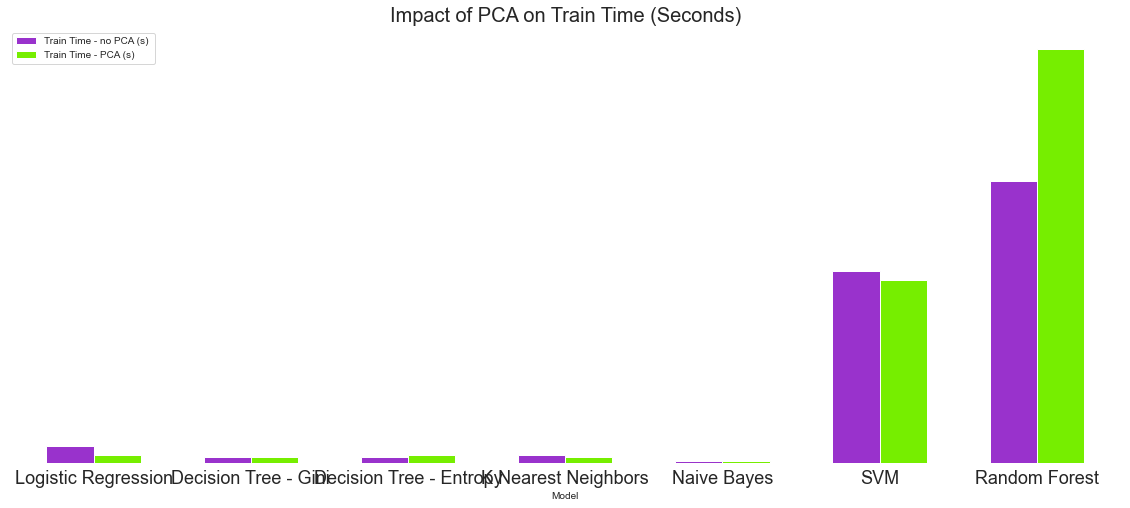

In [97]:
ax = tm.plot(kind='bar', figsize=(20,8), width=0.6, color=['#9932CC', '#76EE00'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Train Time (Seconds)', fontsize=20)



In logistic regression, KNN, naive bayes, and SVM, train time improved with PCA.
In decision tree (both algorithms) and random forest, train time increases after PCA.